In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import os

project_path = '/content/drive/MyDrive/stock_price'
os.chdir(project_path)

# Verify
!ls

 alpha_earnings_calls.csv	 alpha_topic_news.csv
 alpha_economic_indicators.csv	 data
 alpha_stock_prices.csv		 merged_news_stock.csv
 alpha_ticker_news.csv		'merged_news_stock(finbert).csv'


In [3]:
!pip install transformers pandas torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

Combine stock_price file and tricker news file.

In [ ]:
import pandas as pd

# Load stock price data
stock_df = pd.read_csv("alpha_stock_prices.csv")

# Convert stock price 'date' to datetime format
stock_df['date'] = pd.to_datetime(stock_df['date'], format='mixed')
stock_df['date'] = stock_df['date'].dt.strftime("%Y-%m-%d")  # Normalize format

# Load news data
news_df = pd.read_csv("alpha_ticker_news.csv")

# Convert news 'date' to datetime format
news_df['date'] = pd.to_datetime(news_df['date'].str[:8], format="%Y%m%d")
news_df['date'] = news_df['date'].dt.strftime("%Y-%m-%d")  # Normalize format

# Merge the two DataFrames on 'ticker' and 'date'
merged_df = pd.merge(news_df, stock_df, on=["ticker", "date"], how="inner")


# Save result
merged_df.to_csv("merged_news_stock.csv", index=False)
print("Save merged_news_stock.csv")
merged_df.head()

Save merged_news_stock.csv


,ticker,title,summary,sentiment,score,date,open,high,low,close,volume
0,AAPL,"Apple Stock Can Brush Off Tariff Concerns, Ana...",An Apple analyst sees the company beating Q2 r...,Neutral,0.096242,2025-04-23,206.0,208.0,202.799,204.6,52929165
1,AAPL,PayPal is Trading Dirty Cheap at 11.86X P/E: B...,"PYPL's cheap valuation, strong portfolio, and ...",Somewhat-Bullish,0.291644,2025-04-23,206.0,208.0,202.799,204.6,52929165
2,AAPL,Are Apple ETFs Ripe for a Rebound?,Apple (AAPL) shares have outperformed the S&P ...,Somewhat-Bullish,0.175780,2025-04-23,206.0,208.0,202.799,204.6,52929165
3,AAPL,SOUN vs. BBAI: Which AI Stock Has Bigger Poten...,SoundHound and BigBear.ai? See which AI stock ...,Somewhat-Bullish,0.175883,2025-04-23,206.0,208.0,202.799,204.6,52929165
4,AAPL,The Real Reason Trump Walked Back From The Bri...,"To gain an edge, this is what you need to know...",Somewhat-Bullish,0.319079,2025-04-23,206.0,208.0,202.799,204.6,52929165


Disply stock price line chart

In [ ]:
import plotly.express as px

# Create the line chart
fig = px.line(merged_df, x='date', y='close', color='ticker', title='Stock Prices Over Time')

# Customize the chart (optional)
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Closing Price',
    legend_title='Company Ticker'
)

# Show the chart
fig.show()


Remove outliers value , display stock prick line chart.

In [ ]:
# Remove data for ticker "BRK-A"
merged_df = merged_df[merged_df["ticker"] != "BRK-A"]

# Save result
merged_df.to_csv("merged_news_stock.csv", index=False)
print("Save merged_news_stock.csv")
merged_df.head()


# Create the line chart
fig = px.line(merged_df, x='date', y='close', color='ticker', title='Stock Prices Over Time')

# Customize the chart (optional)
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Closing Price',
    legend_title='Company Ticker'
)

# Show the chart
fig.show()


Save merged_news_stock.csv


add finbert sentiment score to the file


In [4]:
from transformers import pipeline

# Load the FinBERT model and tokenizer
finbert = pipeline("sentiment-analysis", model="ProsusAI/finbert")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


In [8]:
import pandas as pd
merged_df = pd.read_csv("merged_news_stock.csv")


In [ ]:
!pip install datasets
from tqdm import tqdm
from datasets import Dataset

In [12]:
# Create a smaller df to test (your code)
df = merged_df

# Convert your pandas DataFrame to a Huggingface Dataset
dataset = Dataset.from_pandas(df)

# Define a function for batch sentiment scoring
def get_finbert_scores_batch(batch):
    try:
        results = finbert(batch['summary'])  # Run FinBERT on the batch
        scores = []
        for result in results:
            if result['label'] == 'positive':
                scores.append(result['score'])
            else:
                scores.append(-result['score'])  # Negative score for negative sentiment
        return {'finbert_score': scores}
    except Exception as e:
        print(f"Error processing batch. Error: {e}")
        return {'finbert_score': [0] * len(batch['summary'])}

# Use tqdm to show progress
dataset = dataset.map(get_finbert_scores_batch, batched=True, batch_size=8)  # Adjust batch_size as needed

# Convert back to pandas DataFrame
df = dataset.to_pandas()

# Display the DataFrame with the new column
print(df.head(10))

# Save the new CSV
df.to_csv("merged_news_stock(finbert).csv", index=False)
print("Saved as merged_news_stock(finbert).csv")


Map:   0%|          | 0/16473 [00:00<?, ? examples/s]

  ticker                                              title  \
0   AAPL  Apple Stock Can Brush Off Tariff Concerns, Ana...   
1   AAPL  PayPal is Trading Dirty Cheap at 11.86X P/E: B...   
2   AAPL                 Are Apple ETFs Ripe for a Rebound?   
3   AAPL  SOUN vs. BBAI: Which AI Stock Has Bigger Poten...   
4   AAPL  The Real Reason Trump Walked Back From The Bri...   
5   AAPL  Here's How Much You Would Have Made Owning App...   
6   AAPL  Analyzing Apple In Comparison To Competitors I...   
7   AAPL  Apple And Meta Fined Nearly $800 Million For V...   
8   AAPL  Technical Analysis For Trading SPY And Top Tec...   
9   AAPL  This May Be the Best Artificial Intelligence  ...   

                                             summary         sentiment  \
0  An Apple analyst sees the company beating Q2 r...           Neutral   
1  PYPL's cheap valuation, strong portfolio, and ...  Somewhat-Bullish   
2  Apple (AAPL) shares have outperformed the S&P ...  Somewhat-Bullish   
3  SoundHo

In [9]:
# from tqdm import tqdm
# # Function to get sentiment score using FinBERT
# def get_finbert_score(text):
#     try:
#         result = finbert(text)[0]
#         if result['label'] == 'positive':
#           return result['score']
#         else:
#           return -result['score']  # Negative score for negative sentiment
#     except Exception as e:
#         print(f"Error processing text: {text}, Error: {e}")
#         return 0  # Return 0 for any errors


# # Apply the function to the 'summary' column and create a new 'finbert_score' column
# df = merged_df

# tqdm.pandas()

# df['finbert_score'] = df['summary'].apply(get_finbert_score)

# # Display the DataFrame with the new column
# df.head(10)

# # Save the new CSV
# df.to_csv("merged_news_stock(finbert).csv", index=False)
# print("merged_news_stock(finbert).csv")


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


KeyboardInterrupt: 

In [18]:
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import mean_squared_error
import os

In [19]:
# -----------------------------
# config
# -----------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
sequence_length = 10
batch_size = 64
num_epochs = 100
patience = 10  # EarlyStopping patience
model_save_path = 'best_model.pth'

In [24]:
# -----------------------------
# load data
# -----------------------------
stock_df =  pd.read_csv("merged_news_stock(finbert).csv")

# ensure sort by ticker and date
stock_df['date'] = pd.to_datetime(stock_df['date'])
stock_df = stock_df.sort_values(by=['ticker', 'date']).reset_index(drop=True)

In [25]:
# -----------------------------
# Normalization
# -----------------------------
feature_cols = ['open', 'high', 'low', 'close']
target_col = 'close'

scaler = MinMaxScaler()
stock_df[feature_cols] = scaler.fit_transform(stock_df[feature_cols])

In [26]:
# -----------------------------
# sliding window Dataset
# -----------------------------
class SlidingWindowDataset(Dataset):
    def __init__(self, df, sequence_length, feature_cols, target_col):
        self.sequence_length = sequence_length
        self.feature_cols = feature_cols
        self.target_col = target_col

        self.X, self.y = self.create_sequences(df)

    def create_sequences(self, df):
        X = []
        y = []
        data = df[self.feature_cols].values
        target = df[self.target_col].values

        for i in range(len(data) - self.sequence_length):
            X.append(data[i:i+self.sequence_length])
            y.append(target[i+self.sequence_length])

        return np.array(X), np.array(y).reshape(-1, 1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.float32)


In [27]:
# -----------------------------
# divide train / val / test by time
# -----------------------------
train_data = stock_df.groupby('ticker').apply(lambda x: x.iloc[:int(0.7 * len(x))]).reset_index(drop=True)
val_data = stock_df.groupby('ticker').apply(lambda x: x.iloc[int(0.7 * len(x)):int(0.85 * len(x))]).reset_index(drop=True)
test_data = stock_df.groupby('ticker').apply(lambda x: x.iloc[int(0.85 * len(x)):]).reset_index(drop=True)

train_dataset = SlidingWindowDataset(train_data, sequence_length, feature_cols, target_col)
val_dataset = SlidingWindowDataset(val_data, sequence_length, feature_cols, target_col)
test_dataset = SlidingWindowDataset(test_data, sequence_length, feature_cols, target_col)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

<ipython-input-27-9eb9290b2dd9>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_data = stock_df.groupby('ticker').apply(lambda x: x.iloc[:int(0.7 * len(x))]).reset_index(drop=True)
<ipython-input-27-9eb9290b2dd9>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  val_data = stock_df.groupby('ticker').apply(lambda x: x.iloc[int(0.7 * len(x)):int(0.85 * len(x))]).reset_index(drop=True)
<ipython-input-27-

In [28]:
# -----------------------------
# LSTM model
# -----------------------------
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = self.fc(out)
        return out

model = LSTMModel(input_size=len(feature_cols)).to(device)

In [29]:
# -----------------------------
# loss funtion, optimizer, scheduler
# -----------------------------
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5, verbose=True)


In [30]:
# -----------------------------
# training
# -----------------------------
def train_model(model, train_loader, val_loader, num_epochs, patience):
    best_loss = np.inf
    epochs_no_improve = 0

    for epoch in range(num_epochs):
        model.train()
        train_losses = []

        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            train_losses.append(loss.item())

        # validate
        model.eval()
        val_losses = []
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_losses.append(loss.item())

        avg_train_loss = np.mean(train_losses)
        avg_val_loss = np.mean(val_losses)
        print(f"Epoch {epoch+1}: Train Loss={avg_train_loss:.6f}, Val Loss={avg_val_loss:.6f}")

        # schedule learning rate
        scheduler.step(avg_val_loss)

        # EarlyStopping
        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            torch.save(model.state_dict(), model_save_path)
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print("Early stopping triggered!")
                break


In [31]:
# -----------------------------
# evaluate
# -----------------------------
def evaluate(model, loader):
    model.eval()
    preds = []
    trues = []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            preds.append(outputs.cpu().numpy())
            trues.append(y_batch.cpu().numpy())

    preds = np.vstack(preds)
    trues = np.vstack(trues)
    mse = mean_squared_error(trues, preds)
    return preds, trues, mse

In [32]:
# -----------------------------
# training
# -----------------------------
train_model(model, train_loader, val_loader, num_epochs, patience)

Epoch 1: Train Loss=0.009491, Val Loss=0.003751
Epoch 2: Train Loss=0.000899, Val Loss=0.003156
Epoch 3: Train Loss=0.000753, Val Loss=0.002623
Epoch 4: Train Loss=0.000625, Val Loss=0.002170
Epoch 5: Train Loss=0.000539, Val Loss=0.002048
Epoch 6: Train Loss=0.000458, Val Loss=0.001608
Epoch 7: Train Loss=0.000411, Val Loss=0.001542
Epoch 8: Train Loss=0.000390, Val Loss=0.001525
Epoch 9: Train Loss=0.000360, Val Loss=0.001498
Epoch 10: Train Loss=0.000348, Val Loss=0.001262
Epoch 11: Train Loss=0.000336, Val Loss=0.001231
Epoch 12: Train Loss=0.000319, Val Loss=0.001215
Epoch 13: Train Loss=0.000329, Val Loss=0.001224
Epoch 14: Train Loss=0.000323, Val Loss=0.001222
Epoch 15: Train Loss=0.000320, Val Loss=0.001326
Epoch 16: Train Loss=0.000332, Val Loss=0.001212
Epoch 17: Train Loss=0.000323, Val Loss=0.001192
Epoch 18: Train Loss=0.000341, Val Loss=0.001207
Epoch 19: Train Loss=0.000324, Val Loss=0.001198
Epoch 20: Train Loss=0.000311, Val Loss=0.001209
Epoch 21: Train Loss=0.000327

In [33]:

# load best model
model.load_state_dict(torch.load(model_save_path))

# evaluate
train_preds, train_trues, train_mse = evaluate(model, train_loader)
val_preds, val_trues, val_mse = evaluate(model, val_loader)
test_preds, test_trues, test_mse = evaluate(model, test_loader)

print(f"Train MSE: {train_mse:.6f}")
print(f"Validation MSE: {val_mse:.6f}")
print(f"Test MSE: {test_mse:.6f}")

Train MSE: 0.000296
Validation MSE: 0.001202
Test MSE: 0.001217


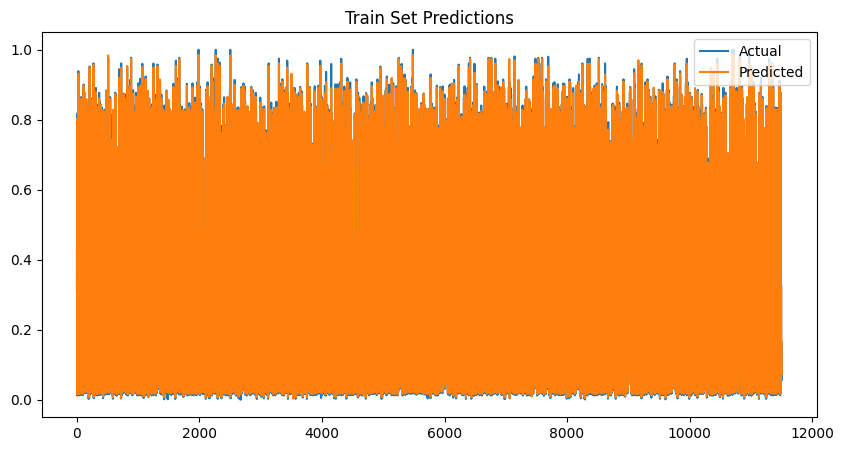

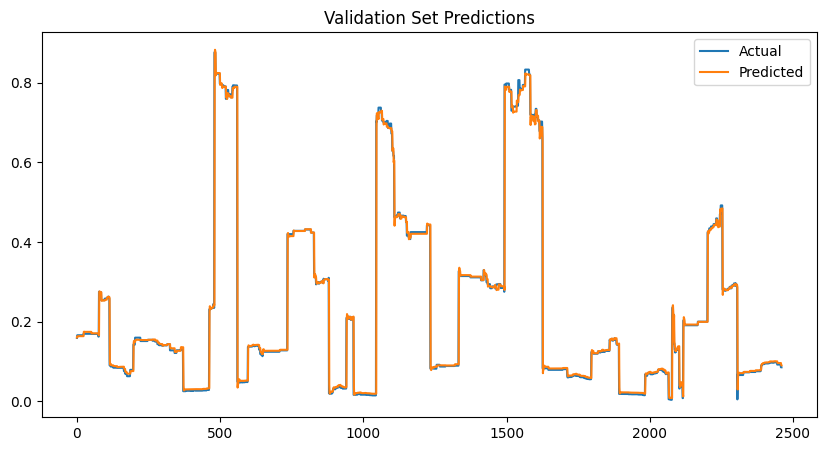

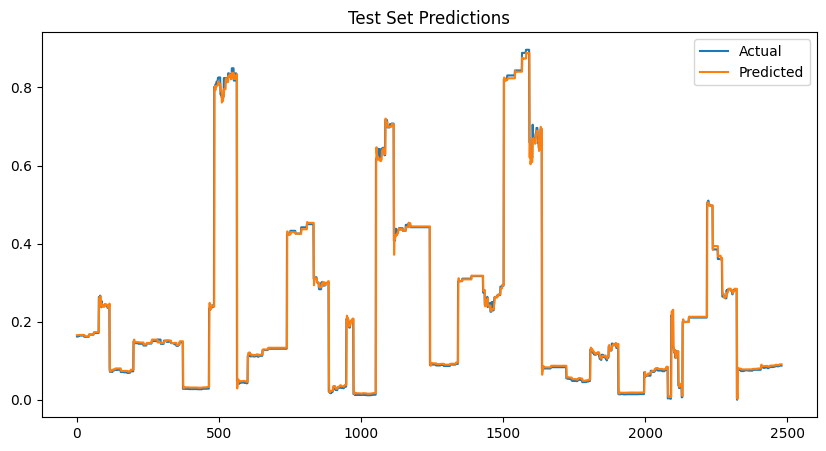

In [34]:
# -----------------------------
# plot
# -----------------------------
def plot_predictions(preds, trues, title):
    plt.figure(figsize=(10,5))
    plt.plot(trues, label='Actual')
    plt.plot(preds, label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()

plot_predictions(train_preds, train_trues, 'Train Set Predictions')
plot_predictions(val_preds, val_trues, 'Validation Set Predictions')
plot_predictions(test_preds, test_trues, 'Test Set Predictions')


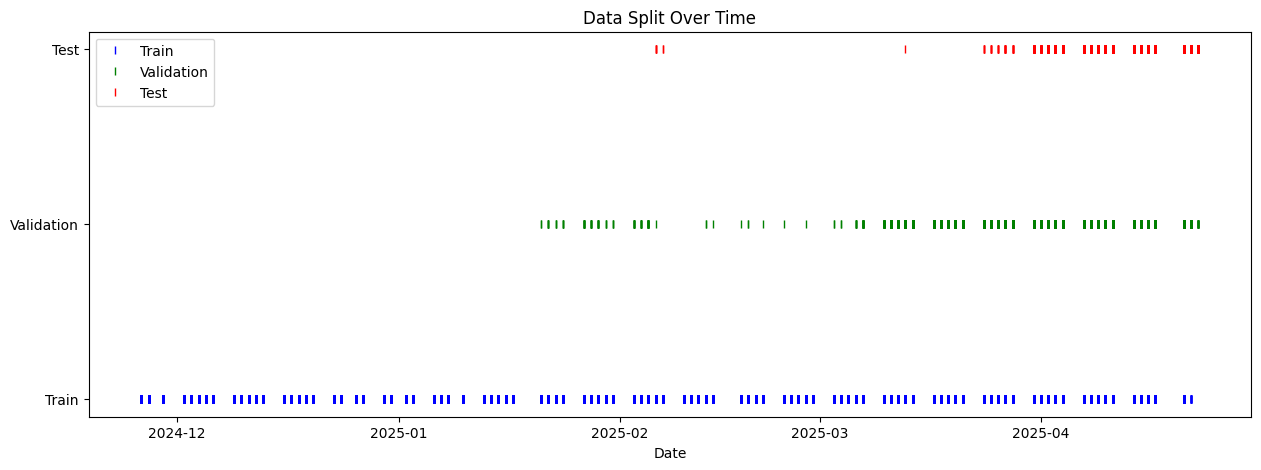

In [35]:
# -----------------------------
# plot
# -----------------------------
train_dates = train_data['date']
val_dates = val_data['date']
test_dates = test_data['date']

plt.figure(figsize=(15, 5))
plt.plot(train_dates, [1]*len(train_dates), '|', label='Train', color='blue')
plt.plot(val_dates, [2]*len(val_dates), '|', label='Validation', color='green')
plt.plot(test_dates, [3]*len(test_dates), '|', label='Test', color='red')

plt.yticks([1,2,3], ['Train', 'Validation', 'Test'])
plt.xlabel('Date')
plt.title('Data Split Over Time')
plt.legend()
plt.show()

In [14]:

# ----------------------------
# Load and preprocess data
# ----------------------------
df = pd.read_csv("merged_news_stock(finbert).csv")
df['finbert_score'] = df['finbert_score'].fillna(0.0)


df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['ticker', 'date'])

# Encode ticker
ticker_encoder = LabelEncoder()
df['ticker_encoded'] = ticker_encoder.fit_transform(df['ticker'])

# Use one scaler for 'close' (for prediction), and another for all features
scaler_close = MinMaxScaler()
df['close'] = scaler_close.fit_transform(df[['close']])

scaler_full = MinMaxScaler()
df[['close', 'finbert_score']] = scaler_full.fit_transform(df[['close', 'finbert_score']])


In [17]:

# ----------------------------
# Split by ticker + time
# ----------------------------
def split_by_time(df, train_frac=0.7, val_frac=0.15):
    train_list, val_list, test_list = [], [], []
    for ticker, group in df.groupby("ticker"):
        group = group.sort_values("date")
        n = len(group)
        if n < 20:  # 太少数据就跳过
            continue
        train_end = int(n * train_frac)
        val_end = int(n * (train_frac + val_frac))
        train_split = group.iloc[:train_end]
        val_split = group.iloc[train_end:val_end]
        test_split = group.iloc[val_end:]
        if len(train_split) > 10:
            train_list.append(train_split)
        if len(val_split) > 10:
            val_list.append(val_split)
        if len(test_split) > 10:
            test_list.append(test_split)
    return pd.concat(train_list), pd.concat(val_list), pd.concat(test_list)


In [16]:

# ----------------------------
# LSTM dataset
# ----------------------------
class StockDataset(Dataset):
    def __init__(self, df, sequence_length=10):
        self.sequence_length = sequence_length
        self.data = []
        grouped = df.groupby('ticker_encoded')
        for _, group in grouped:
            group = group.sort_values('date')
            values = group[['ticker_encoded', 'close', 'finbert_score']].values
            for i in range(len(values) - sequence_length):
                x_seq = values[i:i+sequence_length]
                y_target = values[i+sequence_length][1]  # next day's close
                self.data.append((x_seq, y_target))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x, y = self.data[idx]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# Create loaders
sequence_length = 10
train_loader = DataLoader(StockDataset(train_df, sequence_length), batch_size=64, shuffle=True)
val_loader = DataLoader(StockDataset(val_df, sequence_length), batch_size=64)
test_loader = DataLoader(StockDataset(test_df, sequence_length), batch_size=64)

NameError: name 'train_df' is not defined

In [ ]:

# ----------------------------
# LSTM Model
# ----------------------------
class LSTMModel(nn.Module):
    def __init__(self, input_size=3, hidden_size=64, num_layers=2):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # last time step
        return self.fc(out).squeeze()

model = LSTMModel()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:

# ----------------------------
# Training loop
# ----------------------------
print("🚀 Starting training...")
for epoch in range(10):
    model.train()
    total_loss = 0
    for x_batch, y_batch in train_loader:
        output = model(x_batch)
        loss = loss_fn(output, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

🚀 Starting training...
Epoch 1, Loss: 0.4307
Epoch 2, Loss: 0.3455
Epoch 3, Loss: 0.2578
Epoch 4, Loss: 0.1708
Epoch 5, Loss: 0.0910
Epoch 6, Loss: 0.0290
Epoch 7, Loss: 0.0006
Epoch 8, Loss: 0.0205
Epoch 9, Loss: 0.0740
Epoch 10, Loss: 0.1115


In [ ]:

# ----------------------------
# Evaluation
# ----------------------------
def evaluate(model, dataloader, scaler_close):
    model.eval()
    preds, actuals = [], []
    with torch.no_grad():
        for x_batch, y_batch in dataloader:
            output = model(x_batch).cpu().numpy()
            preds.extend(output)
            actuals.extend(y_batch.numpy())
    preds_np = scaler_close.inverse_transform(np.array(preds).reshape(-1, 1)).flatten()
    actuals_np = scaler_close.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()
    mse = mean_squared_error(actuals_np, preds_np)
    return preds_np, actuals_np, mse

In [ ]:

def plot_predictions(preds, actuals, title):
    plt.figure(figsize=(10, 4))
    plt.plot(actuals, label="Actual", color="black")
    plt.plot(preds, label="Predicted", color="orange")
    plt.title(title)
    plt.xlabel("Time Step")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Run evaluation
train_preds, train_actuals, train_mse = evaluate(model, train_loader, scaler_close)
val_preds, val_actuals, val_mse = evaluate(model, val_loader, scaler_close)
test_preds, test_actuals, test_mse = evaluate(model, test_loader, scaler_close)

print(f"\n✅ Evaluation complete:")
print(f"Train MSE: {train_mse:.2f}")
print(f"Val MSE:   {val_mse:.2f}")
print(f"Test MSE:  {test_mse:.2f}")

# Plot predictions
plot_predictions(train_preds, train_actuals, "Train Set: Predicted vs Actual")
plot_predictions(val_preds, val_actuals, "Validation Set: Predicted vs Actual")
plot_predictions(test_preds, test_actuals, "Test Set: Predicted vs Actual")

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.